In [1]:
import pandas as pd

from datetime import date

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [3]:
days = pd.read_json('../data/link-day-counts.json/part-00000-5ae47e52-be50-4899-ab6f-4bfcab96b8b2-c000.json', lines=True)

In [4]:
days['date'] = days.apply(lambda r: date(r.year, r.month, r.day), axis=1)

In [5]:
x = days.date.unique()

In [33]:
def plot_vol(df, ymax=None):
    
    counts = df.groupby('date').sum()['count']
    y = [counts.get(d, 0) for d in x]
    
    plt.figure(figsize=(20,3))
    plt.yscale('log')
    
    if ymax:
        plt.ylim(1, ymax)
    
    plt.bar(x, y, linewidth=0, width=1)
    plt.show()

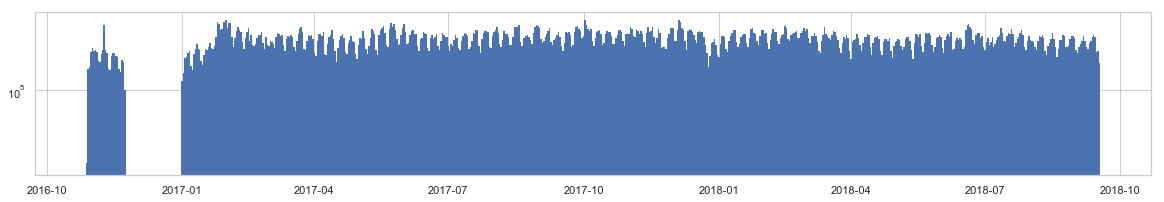

In [34]:
plot_vol(days)

nytimes.com


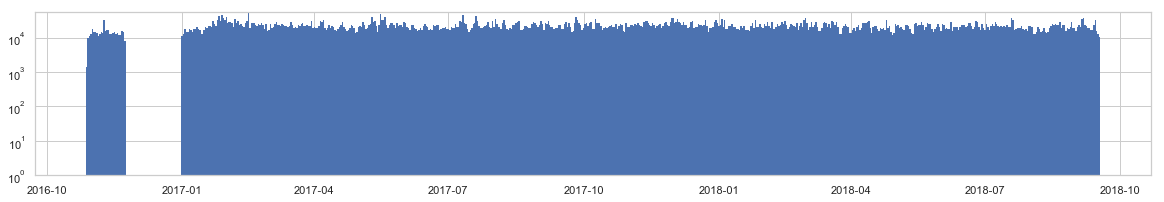

cnn.com


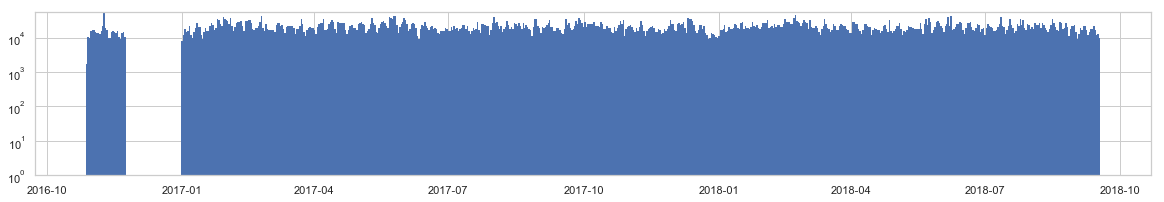

washingtonpost.com


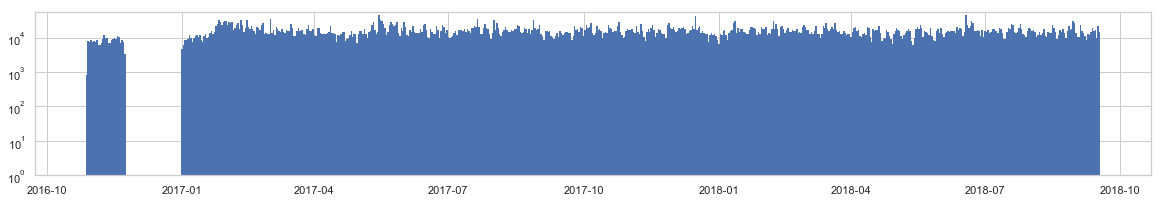

thehill.com


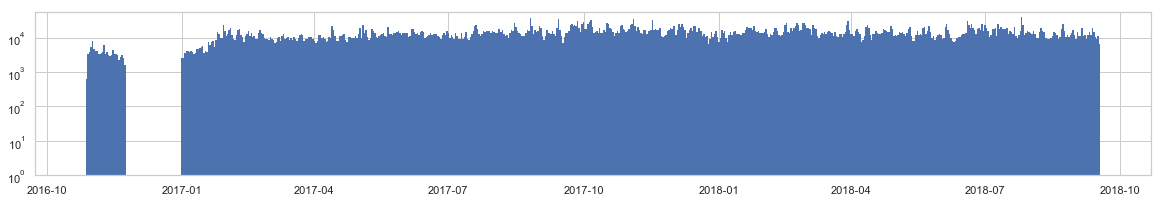

theguardian.com


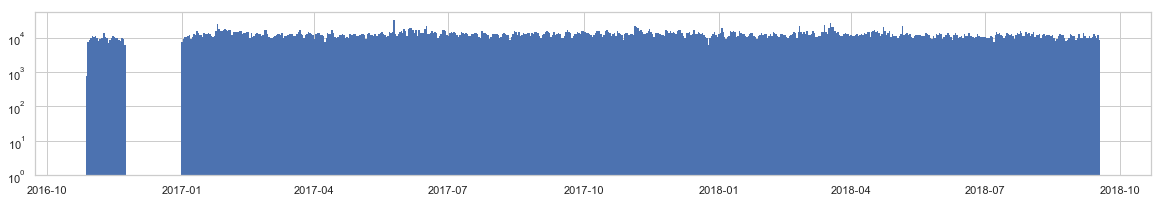

bbc.co.uk


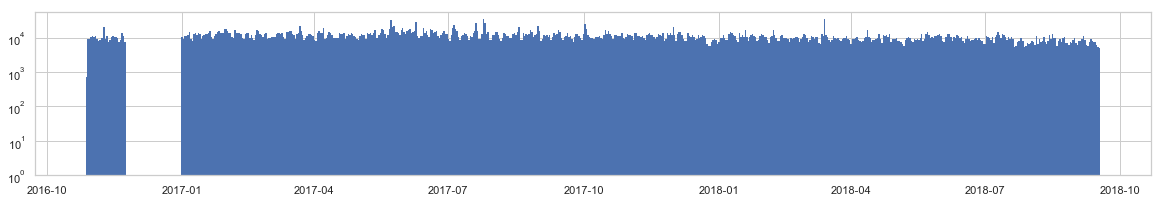

foxnews.com


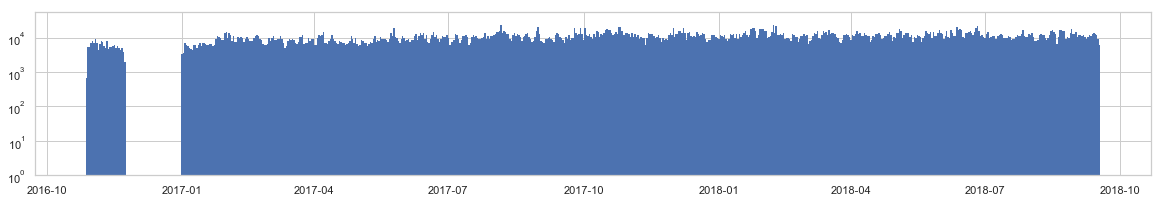

reuters.com


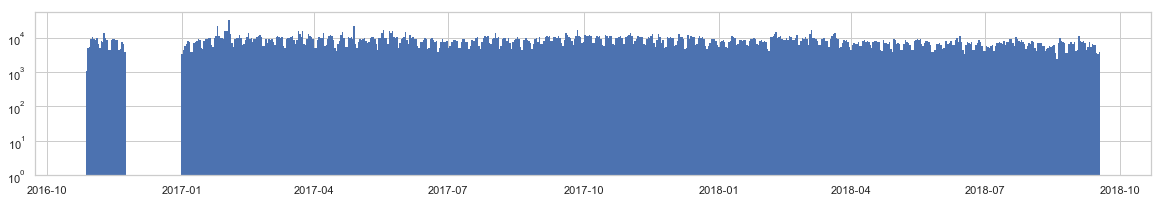

breitbart.com


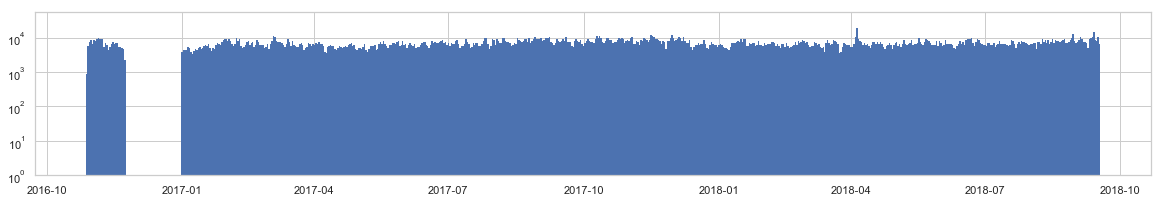

huffingtonpost.com


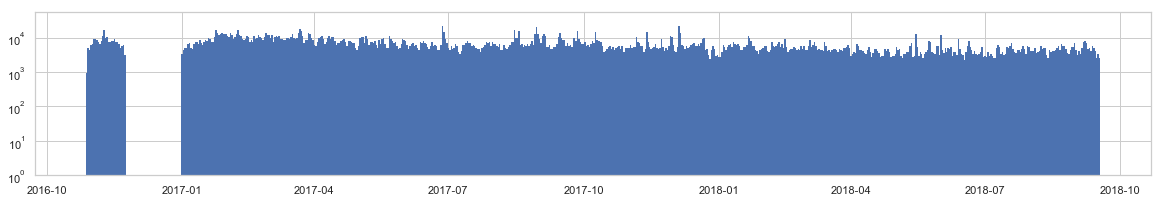

buzzfeed.com


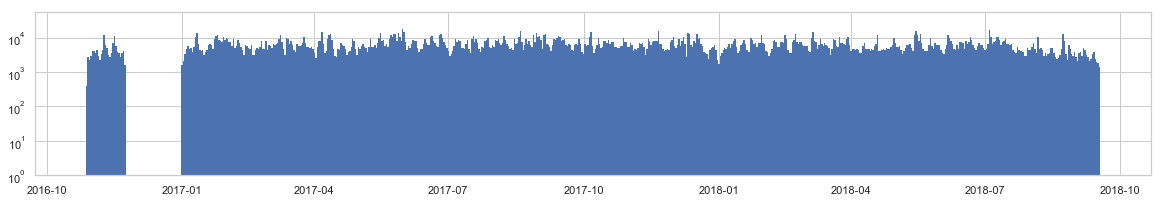

rt.com


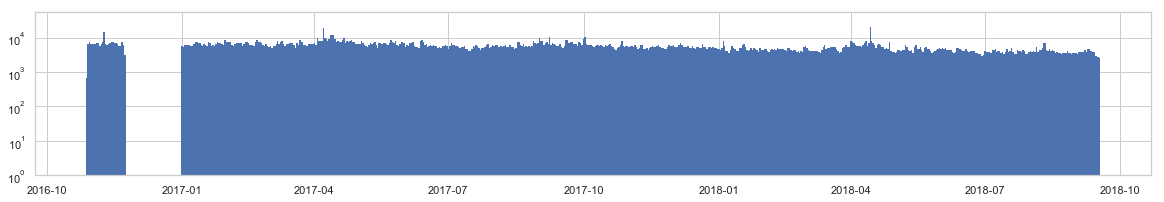

politico.com


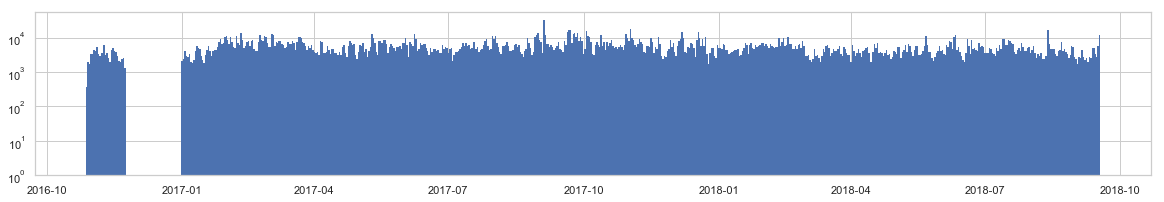

yahoo.com


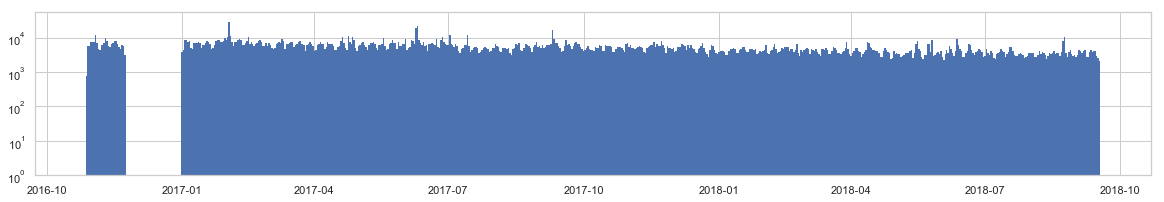

independent.co.uk


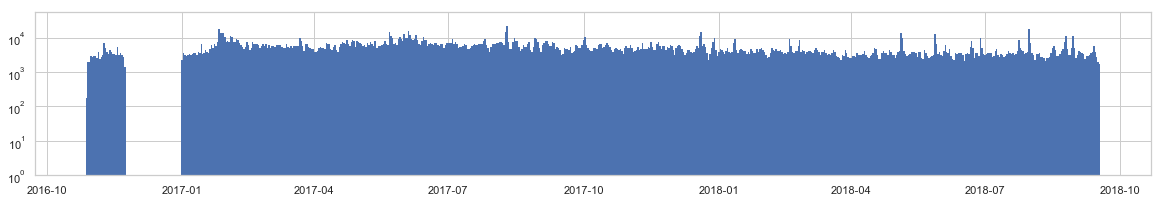

nbcnews.com


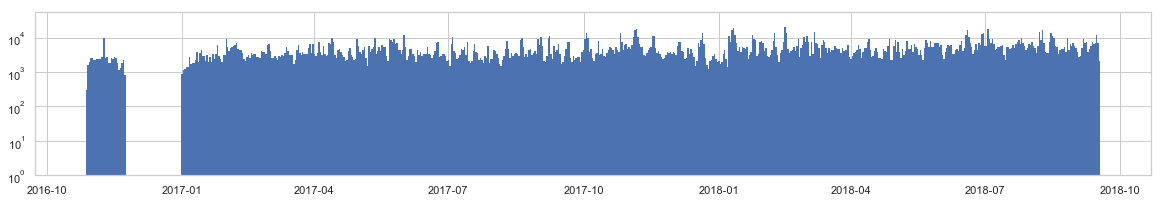

bloomberg.com


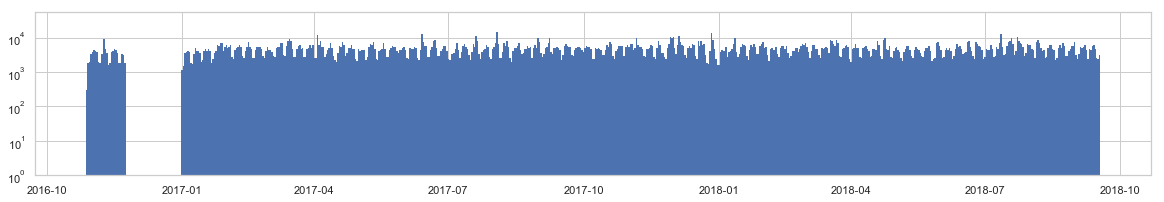

forbes.com


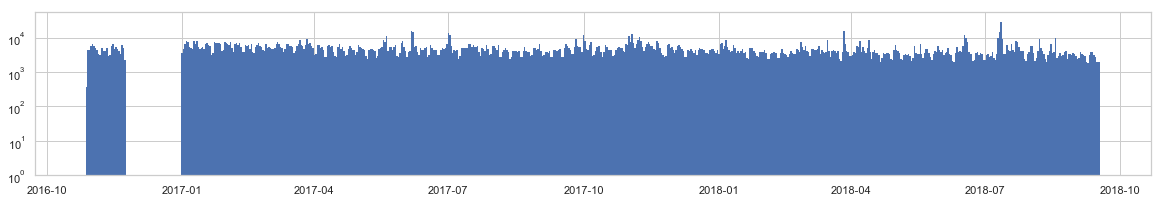

wsj.com


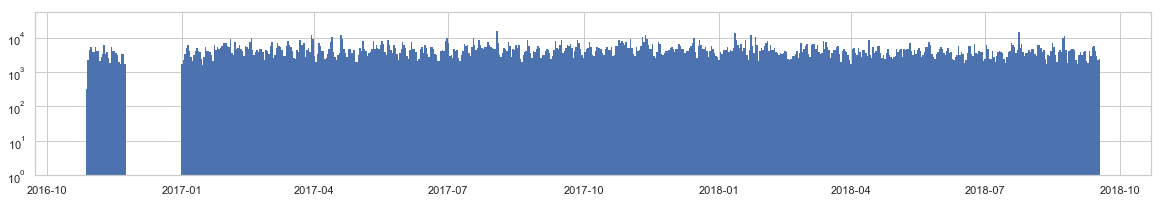

thegatewaypundit.com


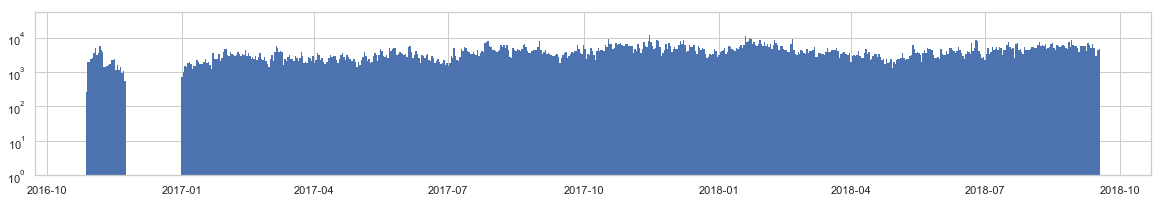

businessinsider.com


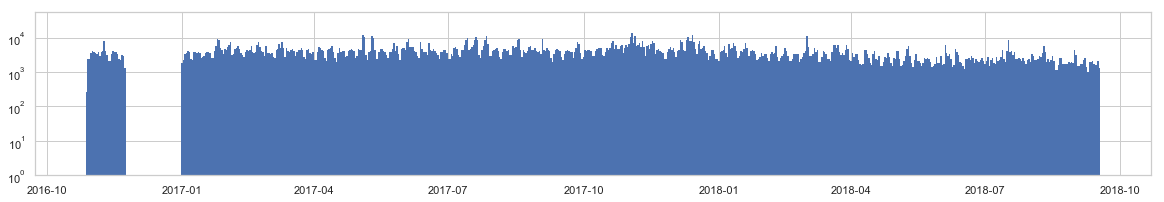

usatoday.com


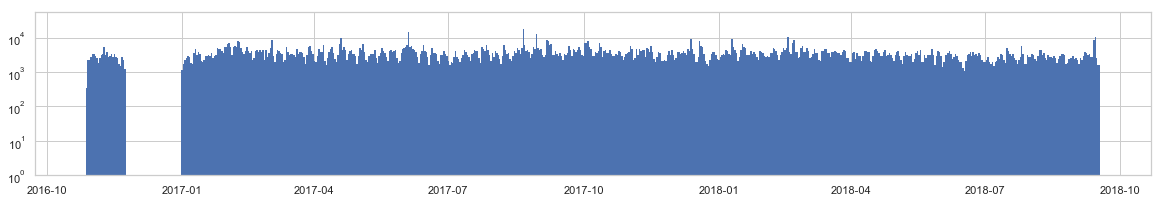

cbsnews.com


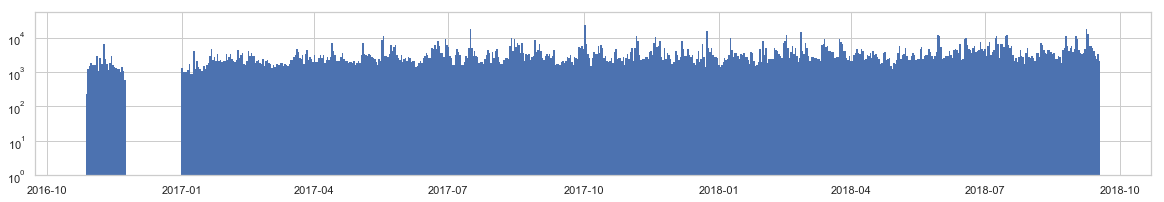

dailycaller.com


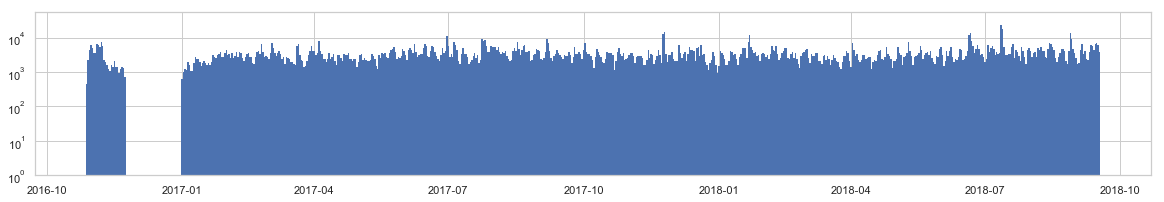

apnews.com


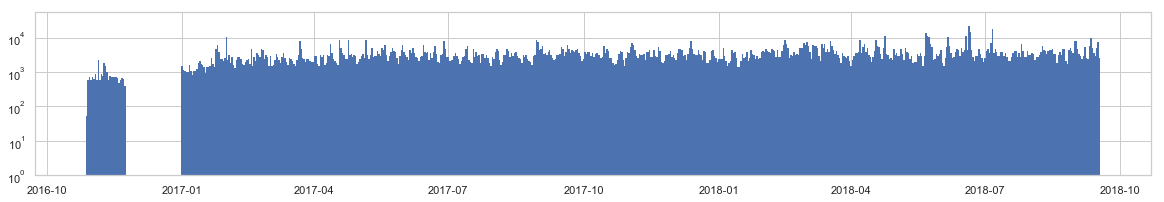

rawstory.com


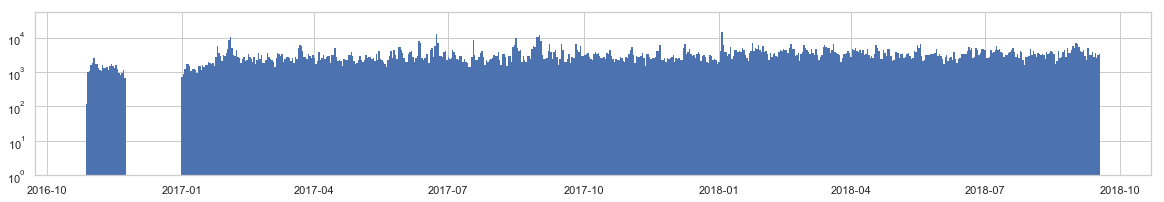

vice.com


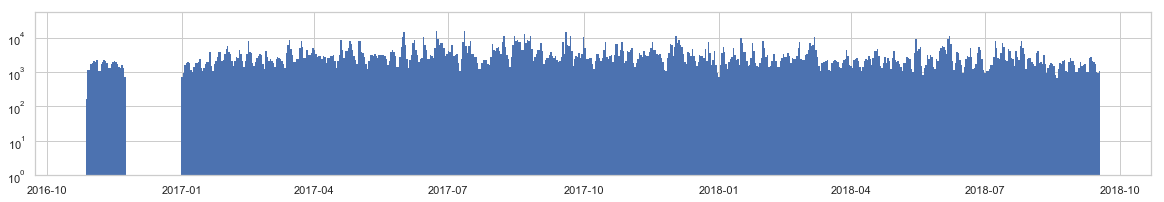

npr.org


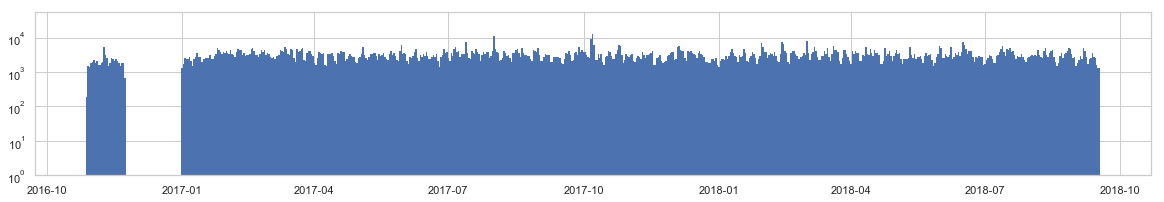

time.com


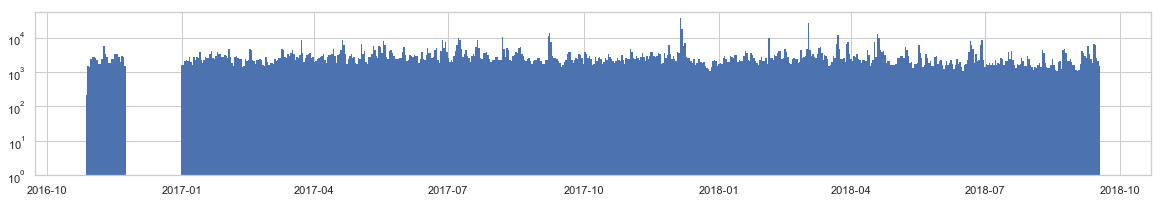

truepundit.com


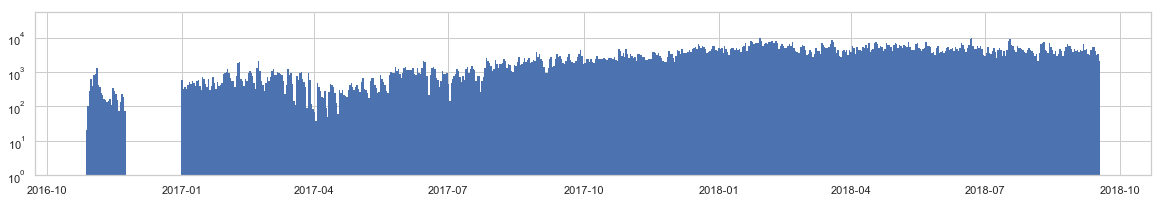

thedailybeast.com


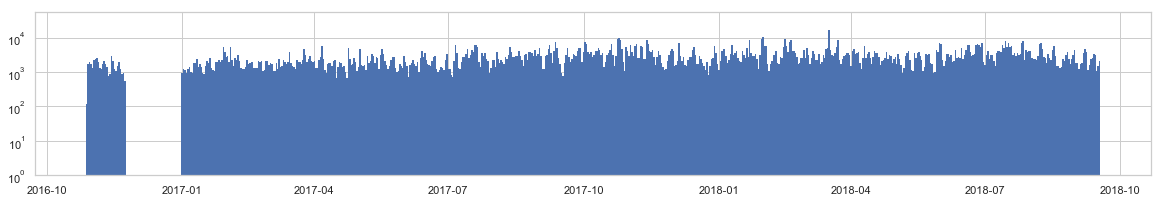

telegraph.co.uk


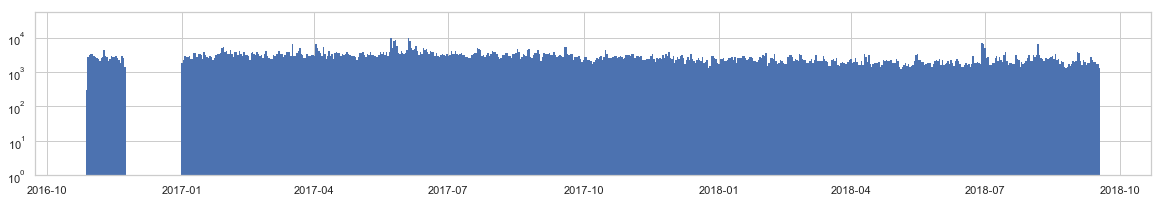

cnbc.com


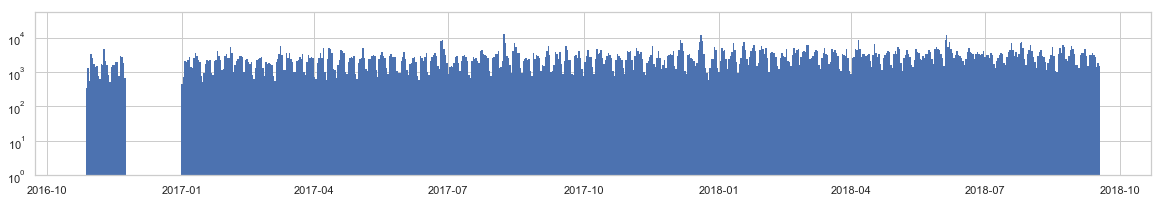

newsweek.com


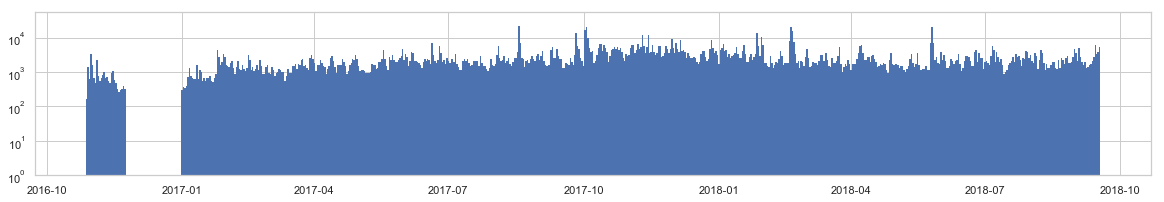

nypost.com


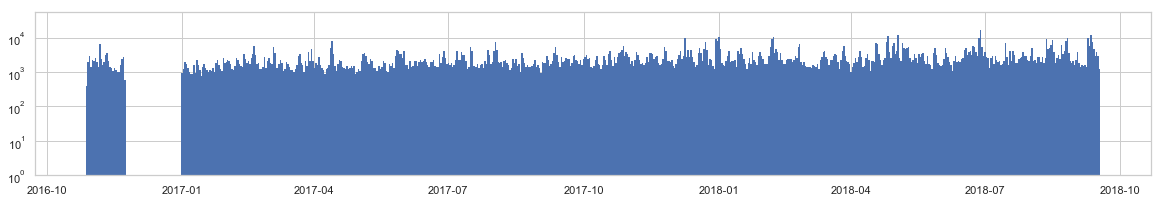

sputniknews.com


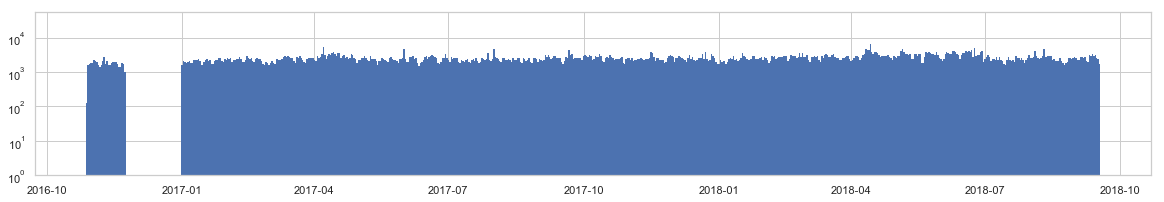

nydailynews.com


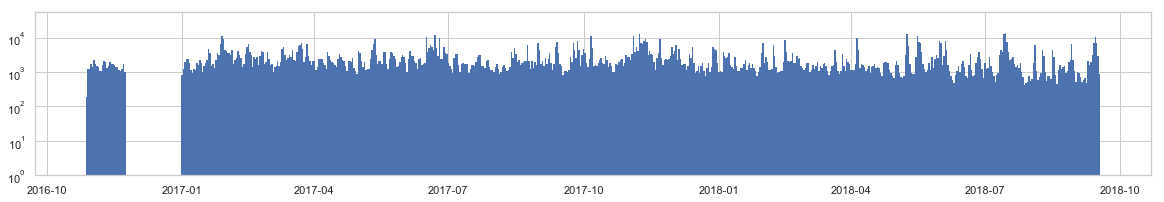

washingtonexaminer.com


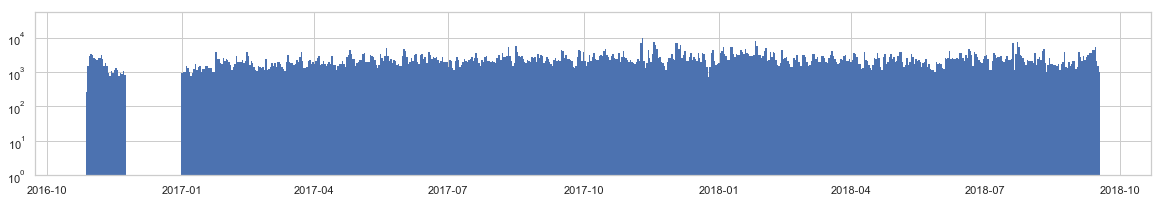

cbc.ca


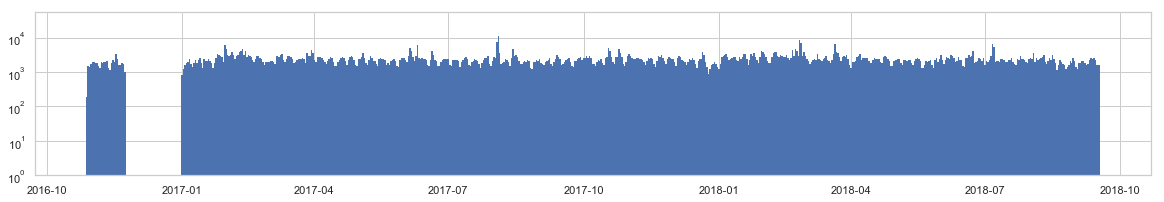

vox.com


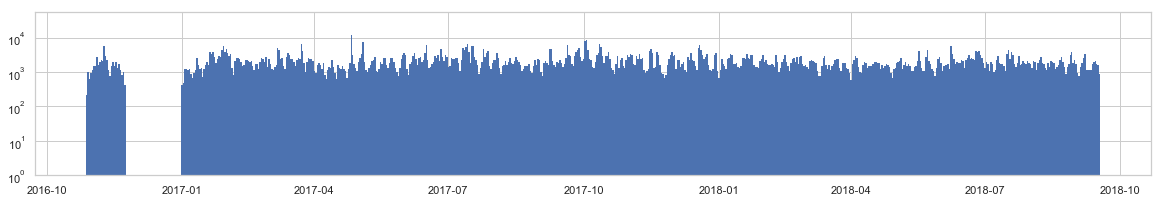

thinkprogress.org


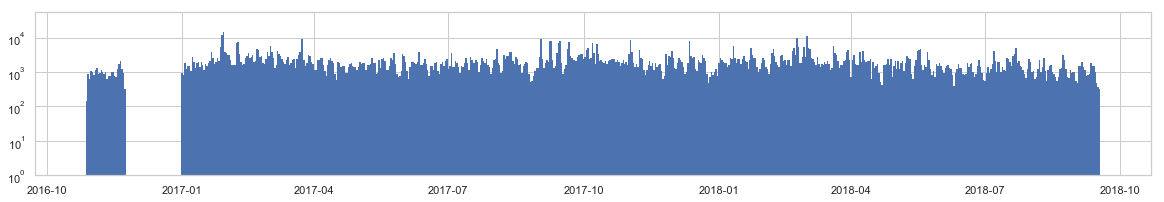

theatlantic.com


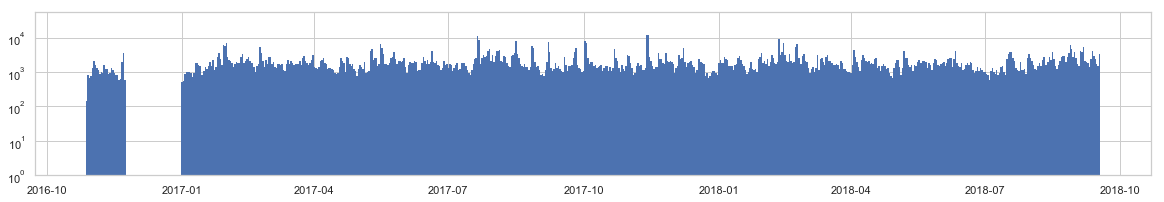

newyorker.com


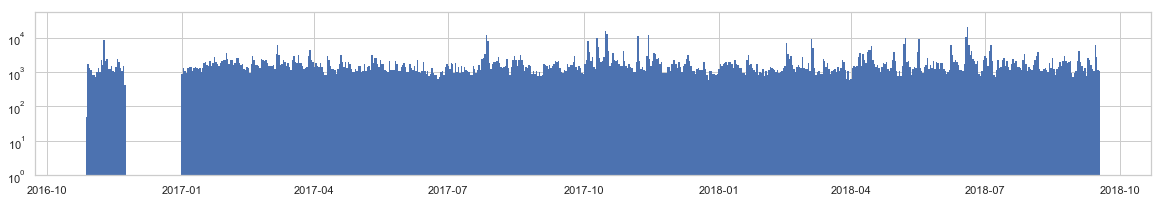

msn.com


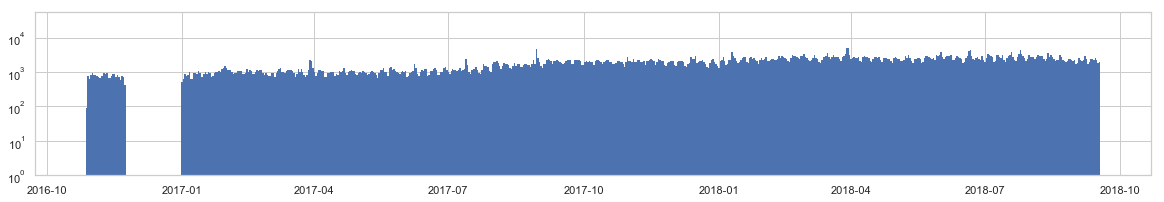

ft.com


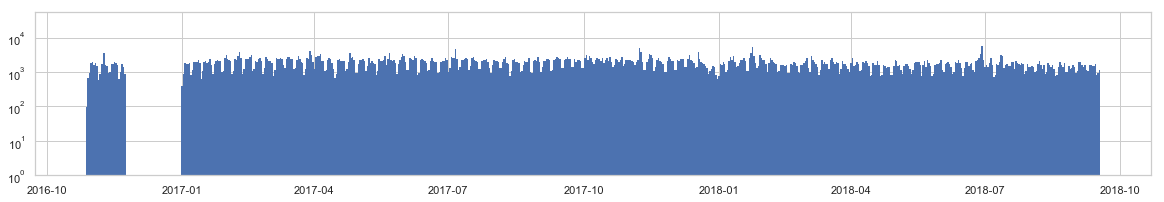

slate.com


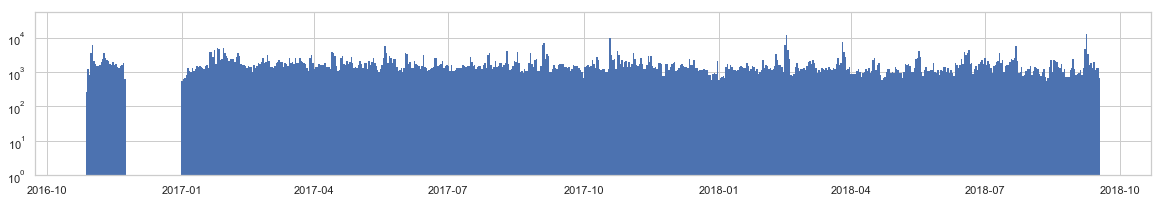

variety.com


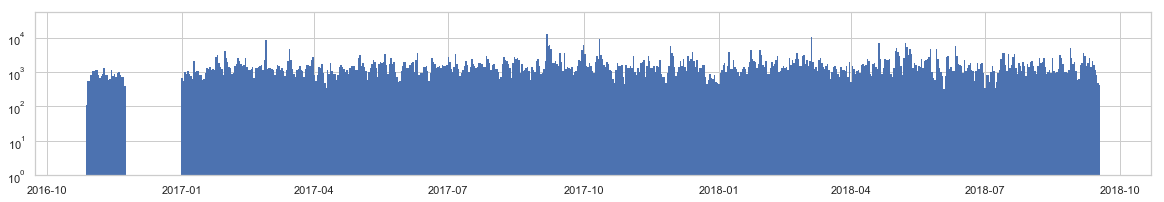

theroot.com


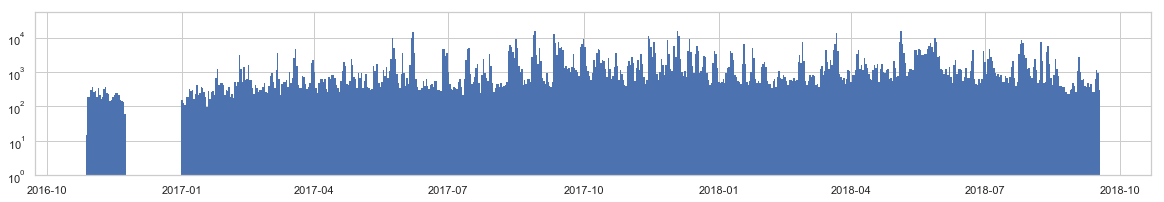

inc.com


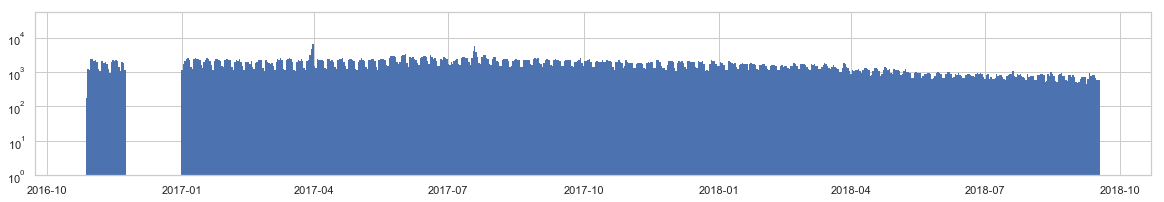

dailykos.com


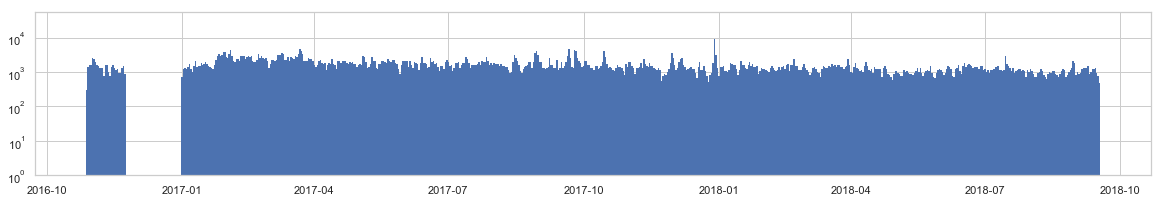

judicialwatch.org


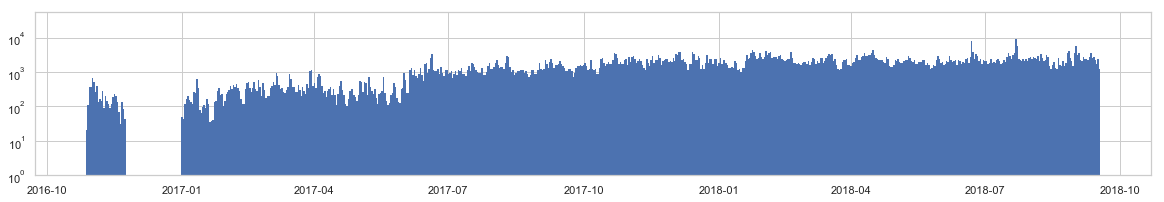

motherjones.com


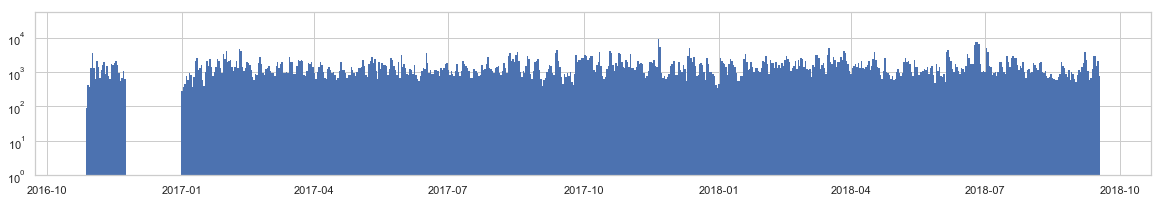

msnbc.com


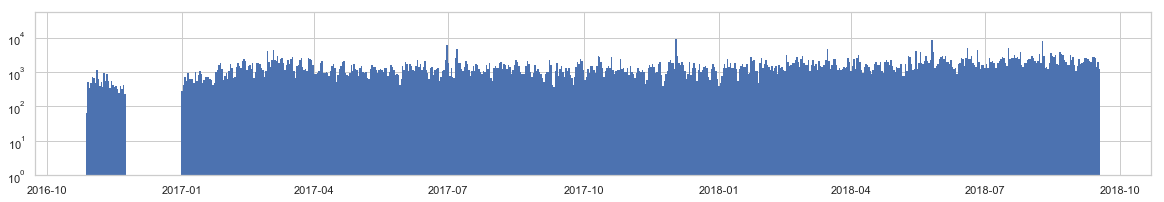

aljazeera.com


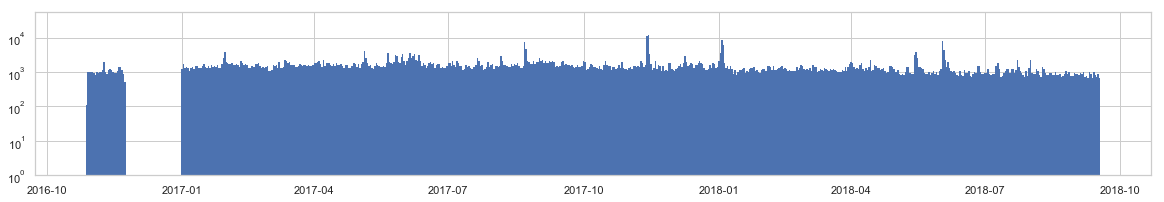

economist.com


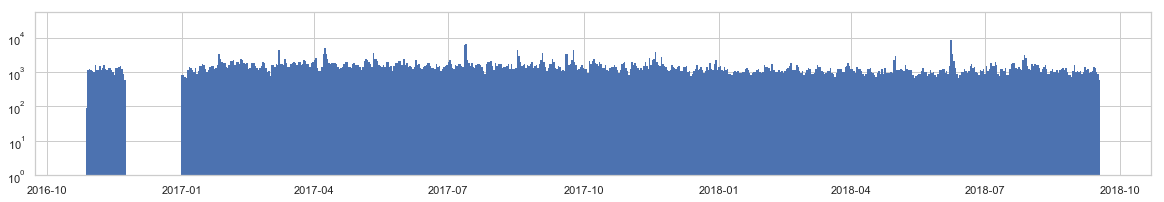

infowars.com


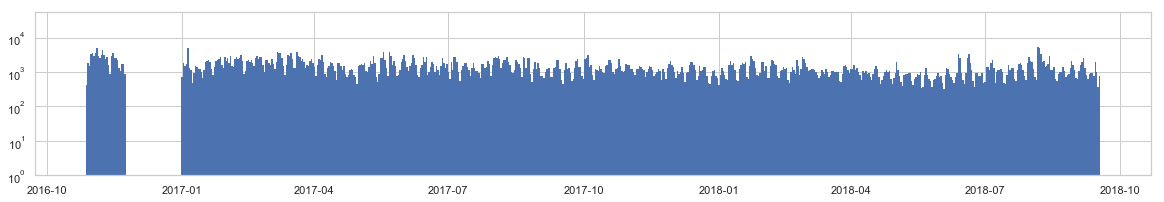

washingtontimes.com


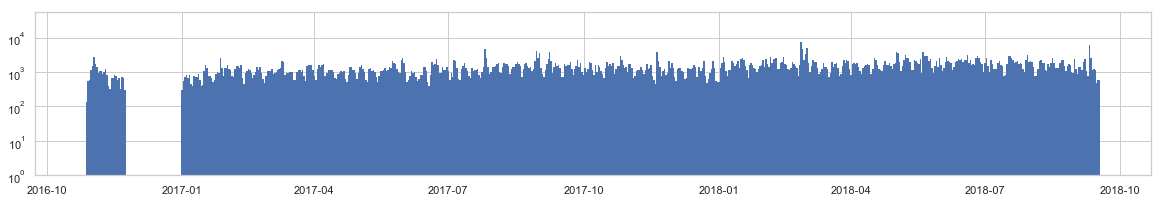

dailywire.com


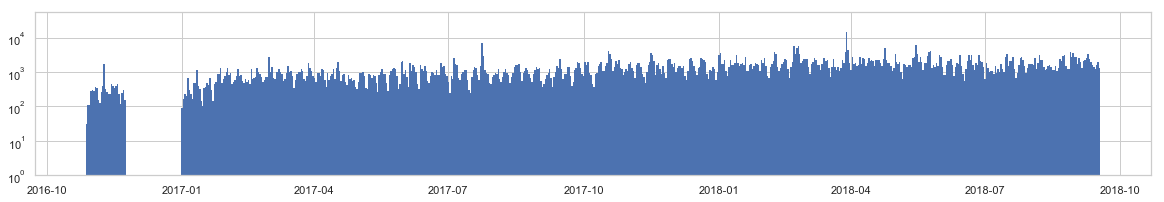

theintercept.com


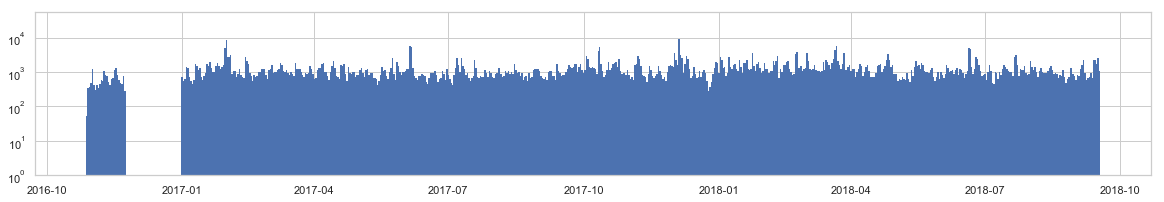

axios.com


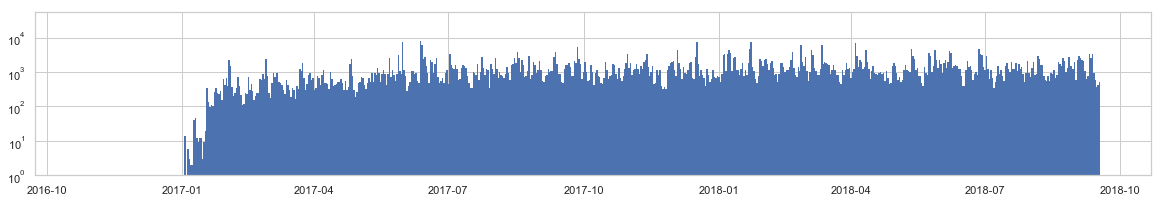

politicususa.com


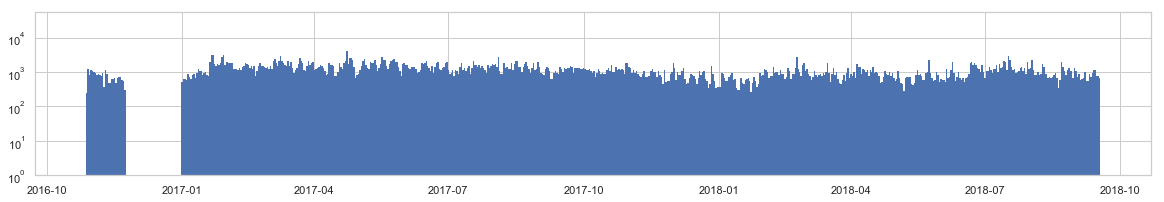

theonion.com


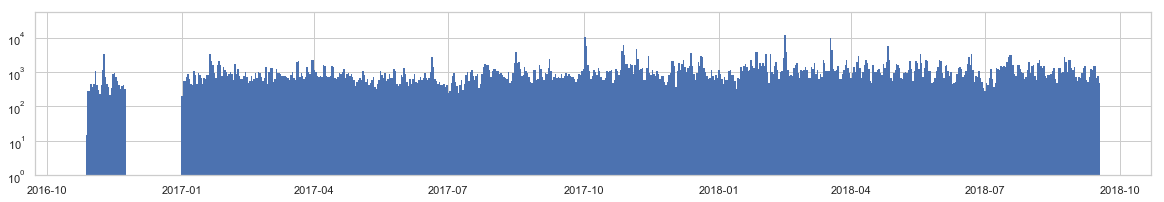

thetimes.co.uk


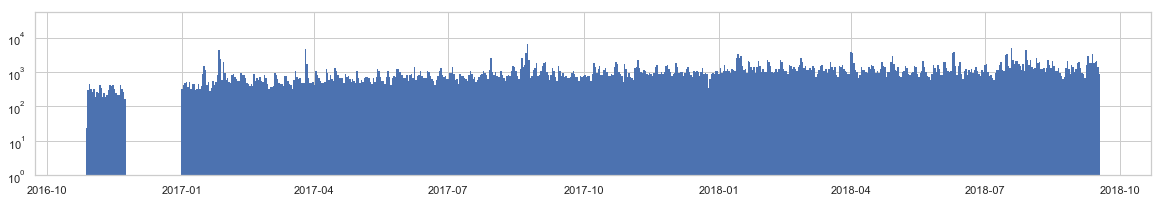

nymag.com


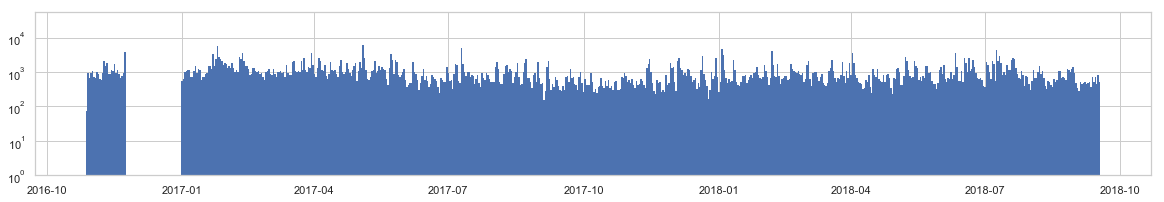

salon.com


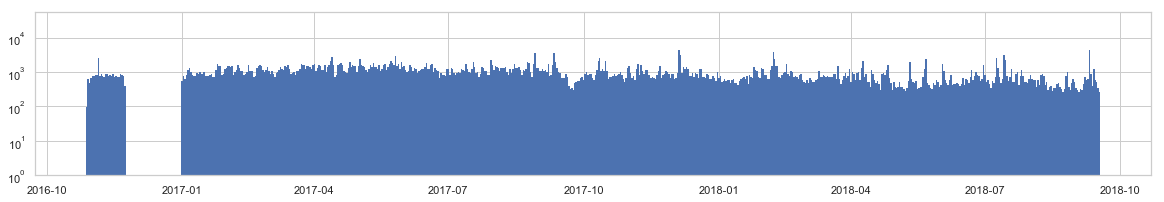

qz.com


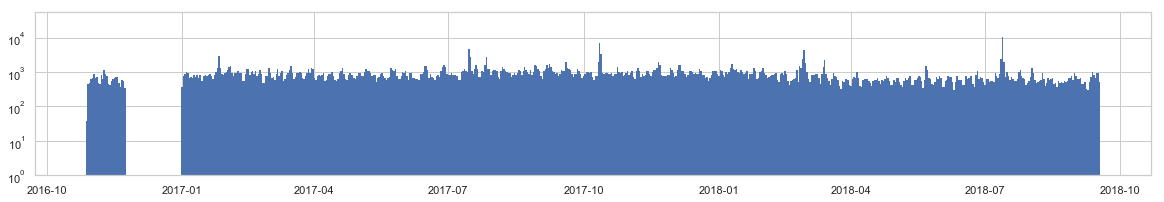

nationalreview.com


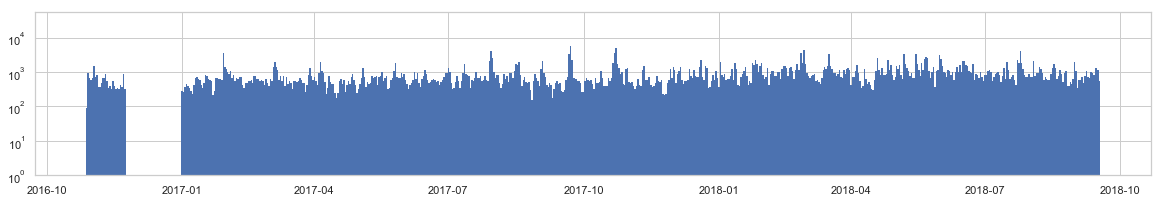

palmerreport.com


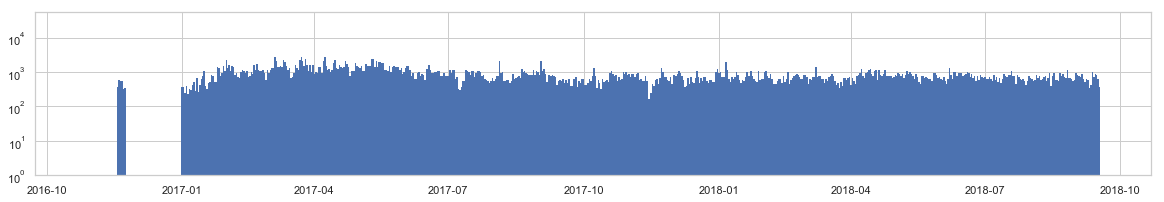

townhall.com


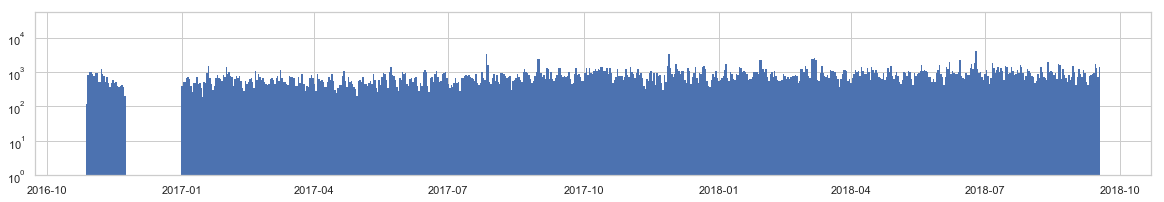

fortune.com


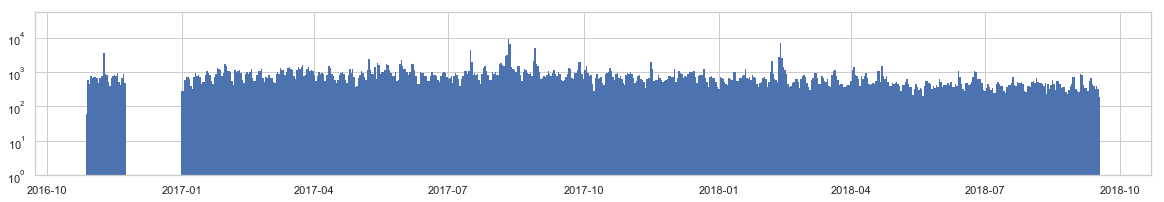

thefederalist.com


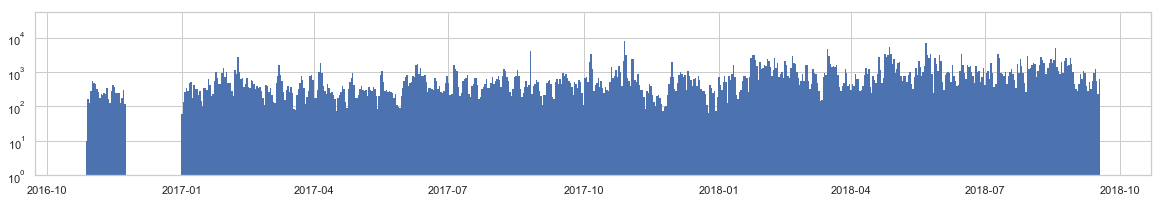

hbr.org


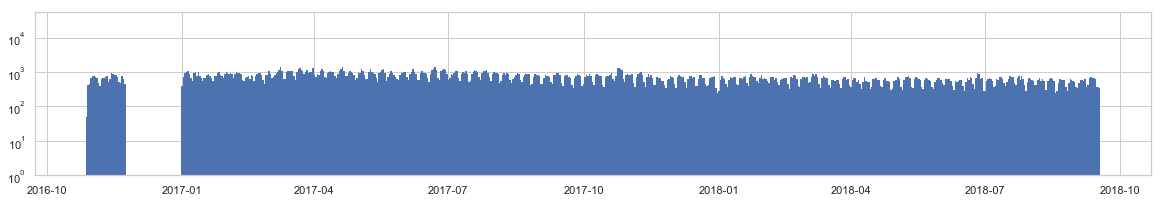

talkingpointsmemo.com


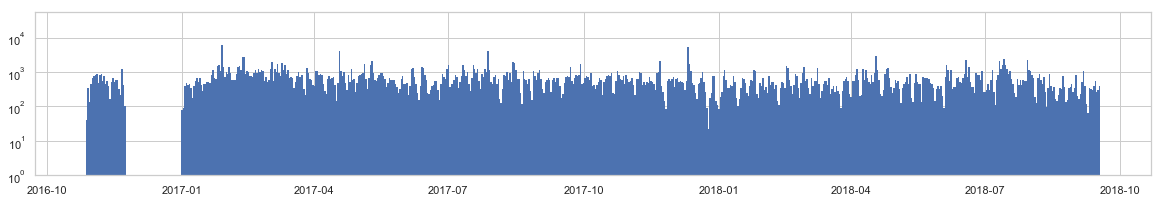

hannity.com


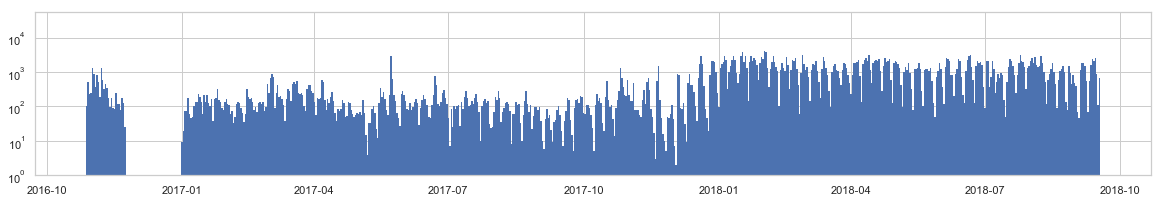

thenation.com


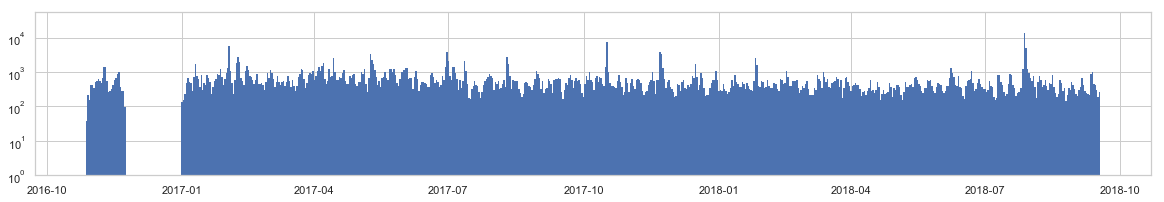

propublica.org


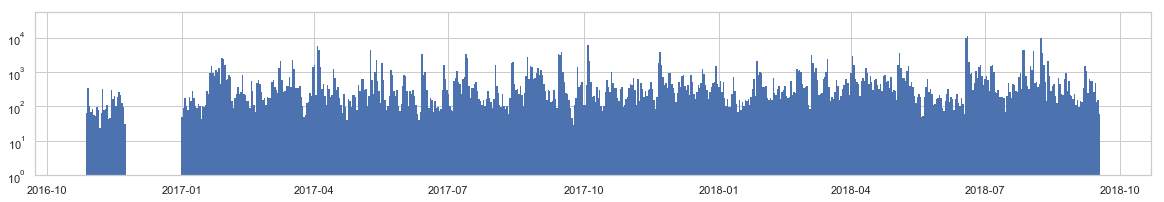

theblaze.com


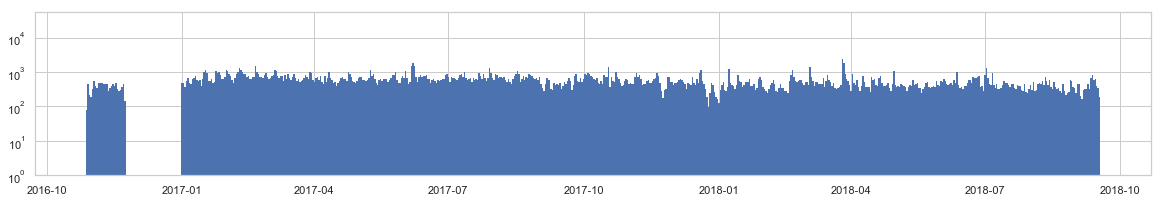

foreignpolicy.com


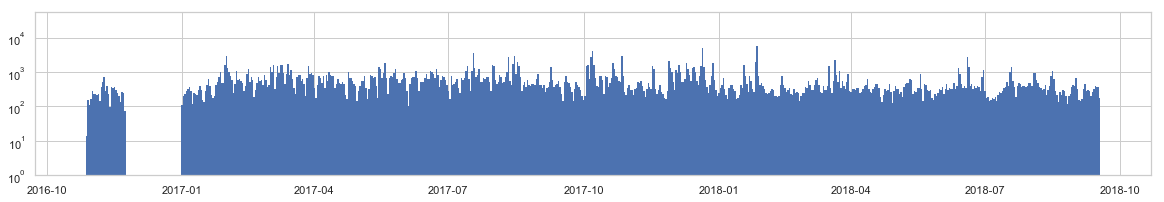

pbs.org


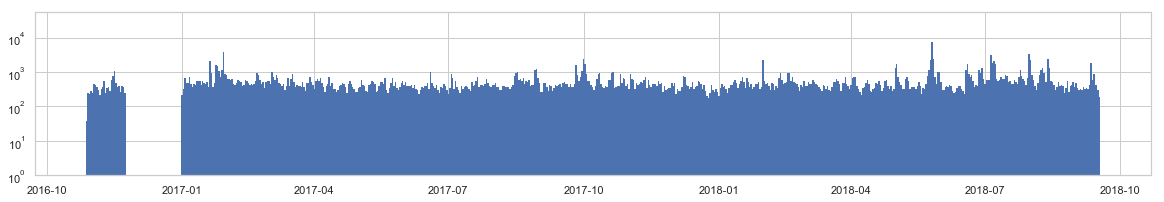

foxbusiness.com


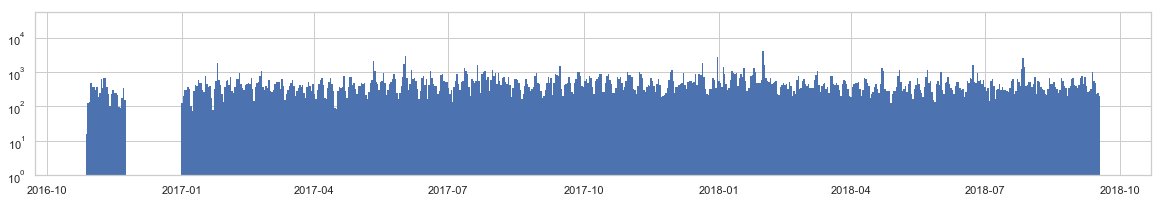

theconversation.com


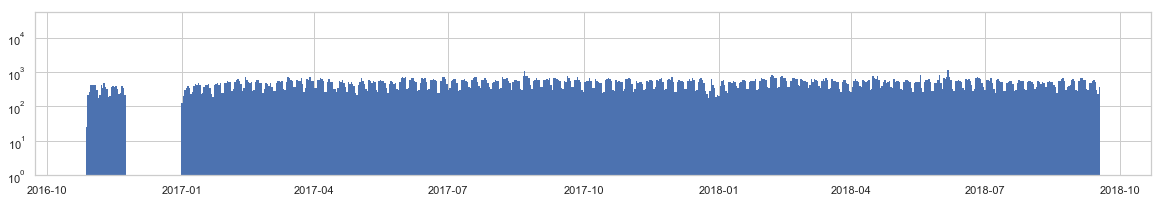

conservativereview.com


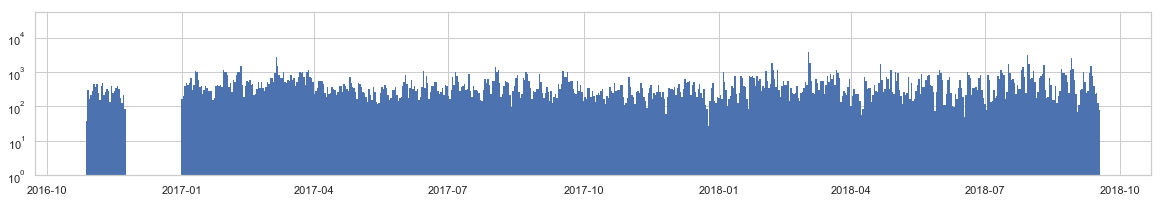

fivethirtyeight.com


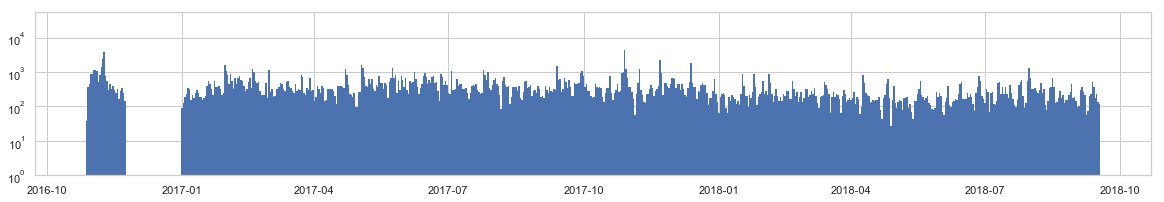

crooksandliars.com


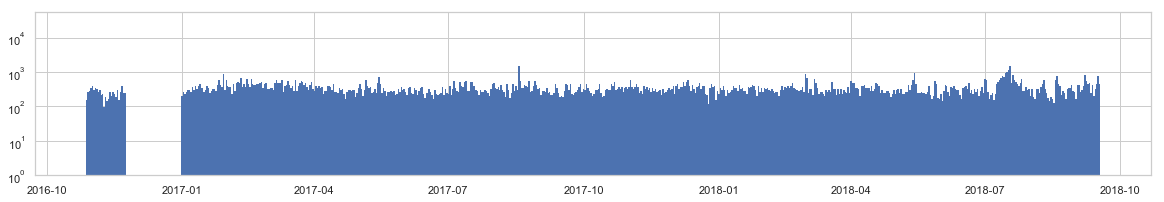

jezebel.com


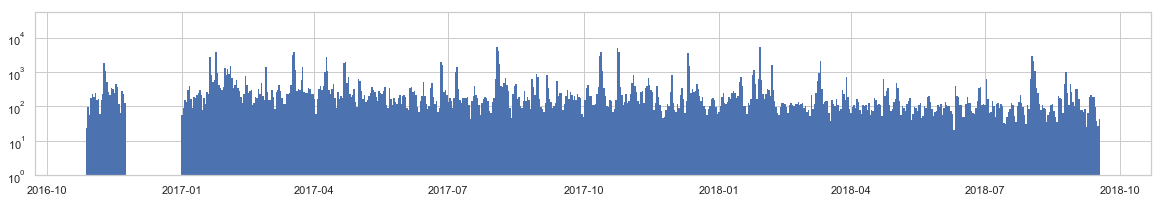

newrepublic.com


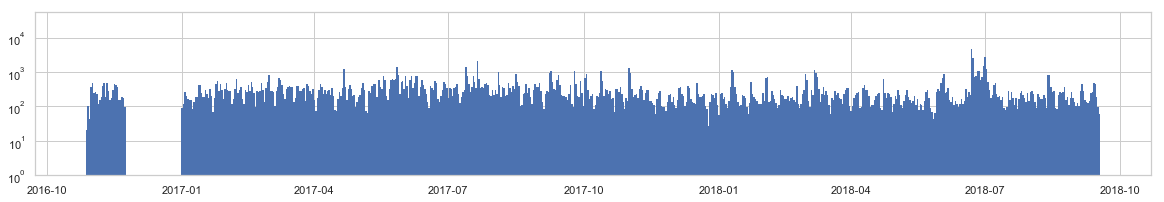

realclearpolitics.com


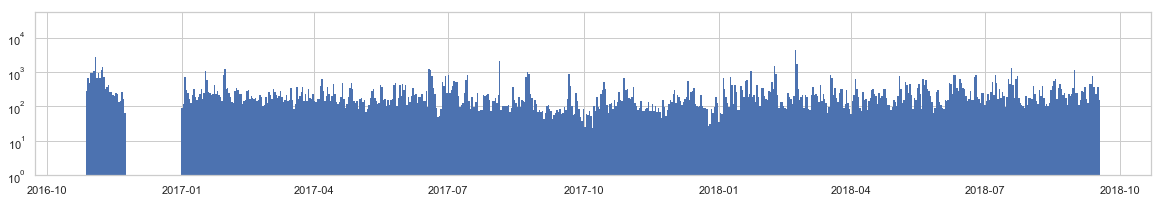

In [35]:
domains = days.groupby('domain').sum().sort_values('count', ascending=False).index

ymax = days['count'].max()

for domain in domains:
    print(domain)
    plot_vol(days[days.domain==domain], ymax)